In [70]:
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
import matplotlib.pyplot as plt
import pickle

In [69]:
# we actually just need it to download cifar dataset
torchvision.datasets.CIFAR10(train=True, download=True, root='../data/')
torchvision.datasets.CIFAR10(train=False, download=True, root='../data/')


Files already downloaded and verified
Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data/
    Split: Test

In [94]:
with open("../data/cifar-10-batches-py/data_batch_1", "rb") as f:
  data = pickle.load(f, encoding="latin1")

In [95]:
data

{'batch_label': 'training batch 1 of 5',
 'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
  0,

In [92]:
data["labels"]

KeyError: 'labels'

In [86]:
data["data"].shape


(10000, 3072)

In [103]:
class CiFaData(Dataset):
  def __init__(self, stage="train"):
    self.base_folder = "cifar-10-batches-py"
    if stage == "train":
      batch_collection = [f"data_batch_{i}" for i in range(1, 4)]
    elif stage == "val":
      batch_collection = ["data_batch_5"]
    elif stage == "test":
      batch_collection = ["test_batch"]
    else:
      raise ValueError("Invalid stage, choose from train, val, test.")
    # x_data = []
    # y_data = []
    # for batch in batch_collection:
    #   with open(f"../data/cifar-10-batches-py/{batch}", "rb") as f:
    #     data = pickle.load(f, encoding="latin1")
    #     x_data.append(data["data"])
    #     y_data.append(data["labels"])
    # self.x_data = torch.tensor(x_data)
    # self.y_data = torch.tensor(y_data)
    self.idx = 0
    self.batch_nr = 0
  def load_batch(self):
    # check at which index we are and load the corresponding batch
     
  def __len__(self):
    # each 'batch' comes with 10k examples
    return self.y_data.shape[0]

  def __getitem__(self, idx):
    return(self.x_data[idx], self.y_data[idx])
    

SyntaxError: invalid syntax (2792582681.py, line 5)

In [104]:
range(1,5)

range(1, 5)

In [ ]:
import os
import pickle
import torch
from torch.utils.data import Dataset

class CiFaData(Dataset):
    def __init__(self, mode='train'):
        self.base_folder = "../data/cifar-10-batches-py"
        self.mode = mode
        if mode == 'train':
            self.batch_files = [f"data_batch_{i}" for i in range(1, 5)]  # 1 through 4 are training batches
        elif mode == 'val':
            self.batch_files = ["data_batch_5"]  # The 5th batch for validation
        elif mode == 'test':
            self.batch_files = ["test_batch"]  # Separate test batch
        else:
            raise ValueError("Invalid mode. Choose 'train', 'val', or 'test'.")

        # We don't load the data here; just prepare the path and indices
        self.data_index = 0
        self.current_batch_data = []
        self.current_batch_labels = []
        self.load_next_batch()

    def load_next_batch(self):
        if self.data_index < len(self.batch_files):
            batch_file = self.batch_files[self.data_index]
            with open(os.path.join(self.base_folder, batch_file), 'rb') as f:
                batch = pickle.load(f, encoding='latin1')
                self.current_batch_data = torch.tensor(batch['data']).reshape(-1, 3, 32, 32).float()
                self.current_batch_labels = torch.tensor(batch['labels'])
            self.data_index += 1
        else:
            self.current_batch_data = []
            self.current_batch_labels = []

    def __len__(self):
        # Assuming 10,000 examples per batch, adjust if different
        return len(self.batch_files) * 10000

    def __getitem__(self, idx):
        batch_idx = idx // 10000  # Determine which batch the idx falls into
        within_batch_idx = idx % 10000  # Determine index within the batch

        # Load the relevant batch if it's not already loaded
        if batch_idx != self.data_index - 1:
            self.data_index = batch_idx
            self.load_next_batch()

        return (self.current_batch_data[within_batch_idx], self.current_batch_labels[within_batch_idx])


In [100]:
train_ds = CiFaData(train=True)
val_ds = CiFaData(val=True)
test_ds = CiFaData(train=False)

In [102]:
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

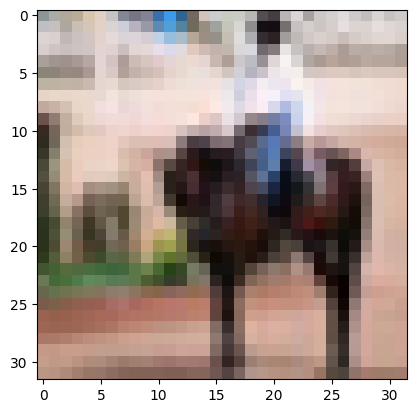

In [53]:
# check the object and look at some images
plt.imshow(train_data[11][0])

In [40]:
train_data[11][1]

7

In [41]:
train_data.classes[7]

'horse'

In [8]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data/
    Split: Test

In [43]:
# create dataloader
train_loader = DataLoader(train_data, 32, shuffle=True)
test_loader = DataLoader(test_data, 33, shuffle=False)

In [44]:
for x, y in train_loader:
  print(x)
  print(y)
  break

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>